## Objetivos del Proyecto

Los objetivos principales de este proyecto son los siguientes:

**Construir un modelo predictivo** capaz de estimar el precio de un alojamiento en Airbnb con alta precisión.

**Identificar las características más influyentes** en el precio de un alojamiento, como:
   - Ubicación
   - Número de habitaciones
   - Tipo de propiedad

**Optimizar el rendimiento del modelo** mediante técnicas avanzadas:
   - GridSearchCV
   - Selección de características

**Evaluar y analizar los errores del modelo** para entender mejor sus limitaciones y áreas de mejora.



## Instalación de Librerías Necesarias

Para realizar el Análisis Exploratorio el preprocesamiento del dataset y los modelos de procesado, necesitamos las siguientes librerías:

- **Pandas:** para manipulación y análisis de datos.
- **NumPy:** para operaciones matemáticas y manejo de arrays.
- **Matplotlib:** para la visualización gráfica de los datos.
- **Seaborn:** para crear gráficos estadísticos de forma más intuitiva.
- **Scikit-Learn:** para el modelado en Machine Learning 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
import random



In [2]:
# Generamos una semilla aleatoria
SEED = random.seed(42)

Si aún no las tienes instaladas, puedes usar el siguiente comando:

In [3]:

#!pip install numpy pandas matplotlib seaborn scikit-learn collections



## Division del Dataset
Cargamos el dataset y lo dividimos entre Train y Test en un 80%/20% de dataset original

In [4]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=SEED)

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

## Carga del Dataset

Importamos el conjunto de datos de Airbnb, utilizando el separador `;`. Además, realizamos una primera visualización para entender su estructura:

- `.info()`: Información general sobre las columnas y tipos de datos.
- `.describe()`: Estadísticas generales de las variables numéricas.
- `.head()`: Visualización de las primeras 5 filas del dataset.


In [5]:
data = pd.read_csv('./train.csv', sep=';', decimal='.')

C:\Users\Nauzet\AppData\Local\Temp\ipykernel_19076\793139147.py:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./train.csv', sep=';', decimal='.')


In [6]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10312.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11778.000000,...,11824.000000,9177.000000,9158.000000,9163.000000,9150.000000,9163.000000,9148.000000,9146.000000,11821.000000,9292.000000
mean,1.031855e+07,2.017037e+13,3.620534e+07,94.806342,12.503595,12.503595,40.470919,-3.831962,3.270721,1.280820,...,22.464817,91.837964,9.421817,9.338426,9.625574,9.658409,9.532138,9.233545,9.452584,1.880194
std,5.571267e+06,5.941848e+08,3.439891e+07,15.302619,34.257669,34.257669,4.912169,14.716384,2.087092,0.650793,...,37.924048,8.819462,0.911835,0.984575,0.805572,0.747025,0.769453,0.933031,23.646642,1.876383
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.580356e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409620,-3.707646,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.460000
50%,1.142681e+07,2.017041e+13,2.461974e+07,100.000000,2.000000,2.000000,40.419334,-3.700720,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.536640e+07,2.017041e+13,5.434329e+07,100.000000,5.000000,5.000000,40.431048,-3.683460,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.792500
max,1.910969e+07,2.017062e+13,1.247388e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [7]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,9085552,https://www.airbnb.com/rooms/9085552,20170407214119,2017-04-08,2 Habitaciones grandes y luminosas,"Piso a 20 min de Plaza España Bus 138, zona ve...",Habitaciones Grandes y luminosas en casa comp...,"Piso a 20 min de Plaza España Bus 138, zona ve...",none,"Zona verde, a quince minutos del metro de puer...",...,10.0,7.0,10.0,NaN,NaN,flexible,2.0,0.13,"40.4043663381,-3.73152077326","Host Has Profile Pic,Host Identity Verified,Re..."
1,8810426,https://www.airbnb.com/rooms/8810426,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE R. 10,"This is a beautiful room in a wonderful flat, ...",NaN,"This is a beautiful room in a wonderful flat, ...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128048276,-3.7035520548","Host Has Profile Pic,Requires License"
2,7057317,https://www.airbnb.com/rooms/7057317,20170407214119,2017-04-08,Habitación privada y amplia,- Habitación privada con una cama sencilla - B...,NaN,- Habitación privada con una cama sencilla - B...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"40.4412203762,-3.68190372265","Host Has Profile Pic,Is Location Exact,Require..."
3,16629117,https://www.airbnb.com/rooms/16629117,20170407214119,2017-04-08,Stylish & Bright 2BD 2BTH - City Center (Malasaña,"Beautiful apartment, comfortable and completel...","Beautiful apartment, comfortable and completel...","Beautiful apartment, comfortable and completel...",none,Malasaña is a dynamic and central neighbourhoo...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.14,"40.4249171109,-3.70407637866","Host Has Profile Pic,Requires License,Instant ..."
4,1610859,https://www.airbnb.com/rooms/1610859,20170407214119,2017-04-08,"Studio in Malasaña, 5 min. Sol",Malasaña is a fashionable downtown neighborhoo...,Studio for rent in the center of madrid Malasa...,Malasaña is a fashionable downtown neighborhoo...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,2.0,6.54,"40.4244050668,-3.70089900625","Host Has Profile Pic,Host Identity Verified,Re..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11349 non-null  object 
 6   Space                           8747 non-null   object 
 7   Description                     11819 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7318 non-null   object 
 10  Notes                           4517 non-null   object 
 11  Transit                         7271 non-null   object 
 12  Access                          

### Observaciones iniciales

A partir del análisis inicial con `.info()` y `.describe()`, podemos observar los siguientes puntos importantes:

- El dataset contiene un total de **89 columnas** y **11.824 entradas**.
- Muchas de estas columnas contienen información que no será útil para el modelo de predicción de precios, como:
  - **IDs**: No aportan valor en términos predictivos.
  - **URLs**: Información de referencia que no influye en el precio.
  - **Información del Host**: No aporta relevancia directa al precio del alojamiento.
  - **Información del Scrap**: Datos de recolección que no afectan al modelo.


**Estrategia planteada:**

Dado este escenario, será necesario realizar una selección de características para eliminar aquellas que:

- No aportan valor al modelo (IDs, URLs, etc.).
- Están excesivamente incompletas (demasiados valores nulos).
- Son redundantes o duplicadas.

Estas columnas no aportan información útil para predecir el precio y solo aumentan la complejidad del modelo.

In [9]:
columnas_eliminar =["ID","Name","Summary","Space","Description","Neighborhood Overview","Notes","Interaction","Listing Url","Scrape ID","Last Scraped","Thumbnail Url","Medium Url","Picture Url","XL Picture Url","Host ID","Host URL","Host Name","Host Since","Host Location","Host About","Host Response Time", "Host Response Rate","Host Acceptance Rate","Host Thumbnail Url","Host Picture Url","Host Neighbourhood","Host Listings Count","Host Total Listings Count","Host Verifications","Calendar last Scraped","First Review","Last Review","License","Jurisdiction Names","Calendar Updated"]
data_v1 =  data.drop(columns=columnas_eliminar)
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             11824 non-null  object 
 1   Transit                         7271 non-null   object 
 2   Access                          6662 non-null   object 
 3   House Rules                     7724 non-null   object 
 4   Street                          11824 non-null  object 
 5   Neighbourhood                   7656 non-null   object 
 6   Neighbourhood Cleansed          11824 non-null  object 
 7   Neighbourhood Group Cleansed    10984 non-null  object 
 8   City                            11819 non-null  object 
 9   State                           11715 non-null  object 
 10  Zipcode                         11424 non-null  object 
 11  Market                          11772 non-null  object 
 12  Smart Location                  

Con esta limpieza inicial, hemos reducido el tamaño del dataset, eliminando información irrelevante para el modelo y optimizando la memoria utilizada, pero podemos reducir aun más el dataset facilmente con los campos que contienen bastantes nulos

## Visualización de Valores Nulos

Para identificar las columnas que presentan un alto porcentaje de valores nulos, calculamos el porcentaje de nulos por cada campo. Esto es importante para:

- Detectar columnas con demasiados datos faltantes que podrían perjudicar el modelo.
- Decidir si eliminarlas o realizar un proceso de imputación.

A continuación, visualizamos el porcentaje de nulos:

In [10]:
nulos_porcentaje = (data_v1.isnull().mean() * 100).sort_values()
nulos_porcentaje

Experiences Offered                0.000000
Cancellation Policy                0.000000
Number of Reviews                  0.000000
Availability 365                   0.000000
Availability 90                    0.000000
Availability 60                    0.000000
Availability 30                    0.000000
Maximum Nights                     0.000000
Minimum Nights                     0.000000
Extra People                       0.000000
Guests Included                    0.000000
Geolocation                        0.000000
Bed Type                           0.000000
Accommodates                       0.000000
Room Type                          0.000000
Property Type                      0.000000
Features                           0.000000
Latitude                           0.000000
Country                            0.000000
Country Code                       0.000000
Street                             0.000000
Neighbourhood Cleansed             0.000000
Smart Location                  

## Eliminación de Columnas con Más del 35% de Valores Nulos

Para optimizar el modelo y reducir el ruido en los datos, se eliminan aquellas columnas que presentan un **35% o más de valores nulos**.

### Justificación:
- Un alto porcentaje de valores faltantes indica que la información no es confiable o no está disponible en la mayoría de los casos.

- Las columnas `Security Deposit` y `Cleaning Fee` se mantienen porque, aunque tienen un alto porcentaje de nulos, podrían tener un valor conceptual importante para el precio final del alojamiento. Evaluaremos más adelante si es necesario eliminarlas.




In [11]:
columnas_eliminar =["Has Availability","Square Feet","Monthly Price","Weekly Price","Access","Transit","Neighbourhood","House Rules"]
data_v2 =  data_v1.drop(columns=columnas_eliminar)
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             11824 non-null  object 
 1   Street                          11824 non-null  object 
 2   Neighbourhood Cleansed          11824 non-null  object 
 3   Neighbourhood Group Cleansed    10984 non-null  object 
 4   City                            11819 non-null  object 
 5   State                           11715 non-null  object 
 6   Zipcode                         11424 non-null  object 
 7   Market                          11772 non-null  object 
 8   Smart Location                  11824 non-null  object 
 9   Country Code                    11824 non-null  object 
 10  Country                         11824 non-null  object 
 11  Latitude                        11824 non-null  float64
 12  Longitude                       

## Eliminación de Columnas Redundantes

Para reducir la dimensionalidad y eliminar información duplicada, descartamos varias columnas que:
- Contienen información que se encuentra en otras variables de forma más optimizada.
- Son irrelevantes para el modelo predictivo.

**Columnas eliminadas:**
**Experiences Offered** → Todos sus valores son "none", por lo tanto, no aporta información relevante.

**Street, Neighbourhood Group Cleansed, State, Smart Location, Country Code, Country, Geolocation,Zipcode, City , Market**:
- Estos datos ya están representados en otras columnas como , "Neighbourhood Cleansed", "Latitude" y "Longitude".


In [12]:

columnas_redundantes = [
    "Experiences Offered","City","Market",
    "Street", "Neighbourhood Group Cleansed", 
    "State", "Smart Location", "Zipcode",
    "Country Code", "Country", "Geolocation"
]
data_v2 = data_v2.drop(columns=columnas_redundantes)
data_v2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          11824 non-null  object 
 1   Latitude                        11824 non-null  float64
 2   Longitude                       11824 non-null  float64
 3   Property Type                   11824 non-null  object 
 4   Room Type                       11824 non-null  object 
 5   Accommodates                    11824 non-null  int64  
 6   Bathrooms                       11778 non-null  float64
 7   Bedrooms                        11806 non-null  float64
 8   Beds                            11785 non-null  float64
 9   Bed Type                        11824 non-null  object 
 10  Amenities                       11680 non-null  object 
 11  Price                           11811 non-null  float64
 12  Security Deposit                

## Exploración de la Variable Objetivo: Price

Para entender mejor la distribución de precios, generamos un histograma con un suavizado de densidad (KDE) que nos permitirá identificar:
- Asimetrías en los precios.
- Colas largas (valores muy altos).
- Picos que puedan indicar comportamientos atípicos.



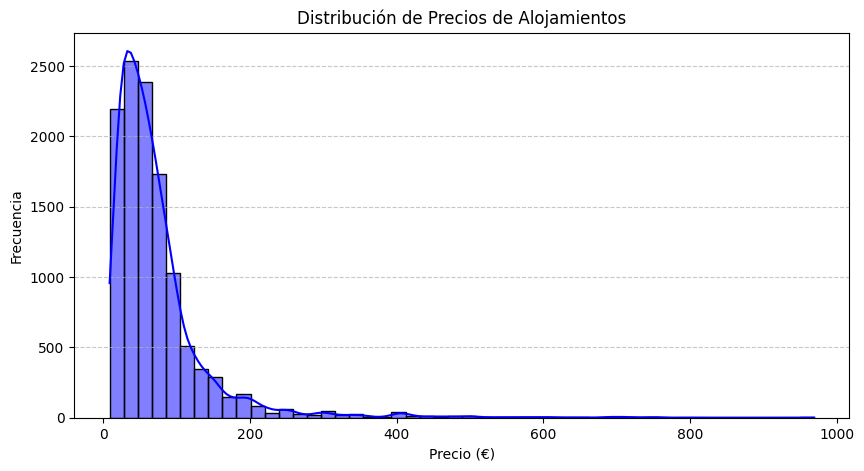

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data_v2['Price'], bins=50, kde=True, color='blue')
plt.title('Distribución de Precios de Alojamientos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Detección de Outliers con Histogramas y Boxplot

Para detectar valores atípicos en el precio, generamos varios Histogramas y un diagrama de caja (Boxplot). Además, calculamos los percentiles para identificar en qué punto se encuentran los precios más altos:

- El percentil 99 será nuestro **límite superior** para detectar outliers.
- Los valores por encima de este límite podrían distorsionar el modelo.


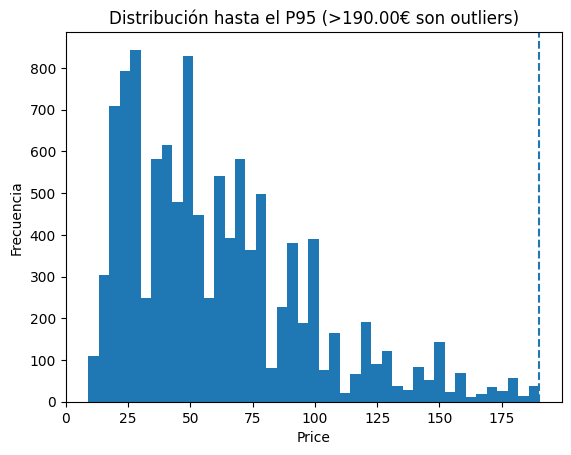

In [ ]:

prices = data_v2["Price"].dropna()
p95    = prices.quantile(0.95)        

plt.hist(prices[prices <= p95], bins="fd")  
plt.axvline(p95, ls="--")           
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.title(f"Distribución hasta el P95 (>{p95:.2f}€ son outliers)")
plt.show()


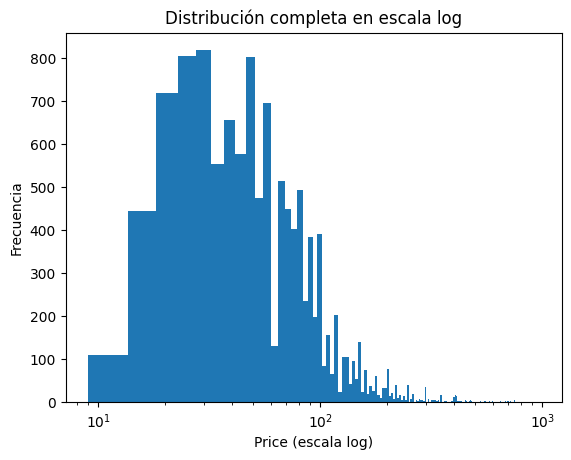

In [ ]:
plt.hist(prices, bins="auto")
plt.xscale("log")          
plt.xlabel("Price (escala log)")
plt.ylabel("Frecuencia")
plt.title("Distribución completa en escala log")
plt.show()


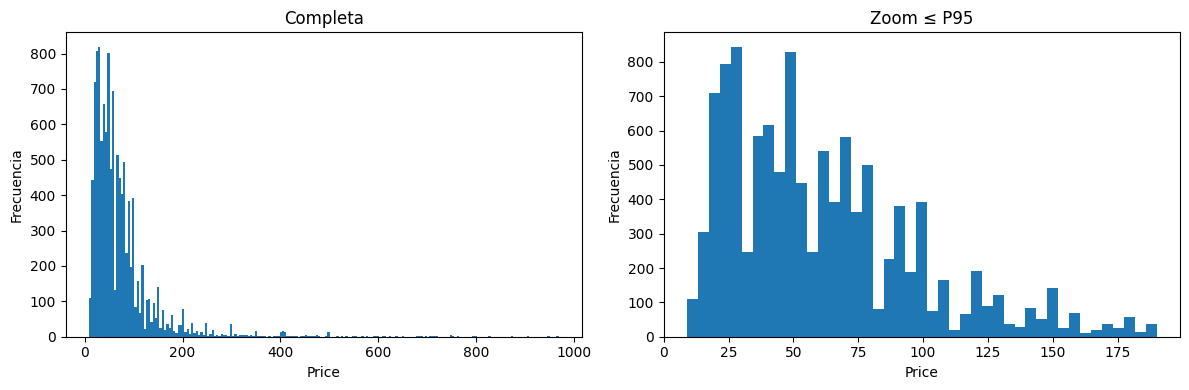

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(prices, bins="fd")
ax1.set_title("Completa")
ax1.set_xlabel("Price")
ax1.set_ylabel("Frecuencia")

ax2.hist(prices[prices <= p95], bins="fd")
ax2.set_title("Zoom ≤ P95")
ax2.set_xlabel("Price")
ax2.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


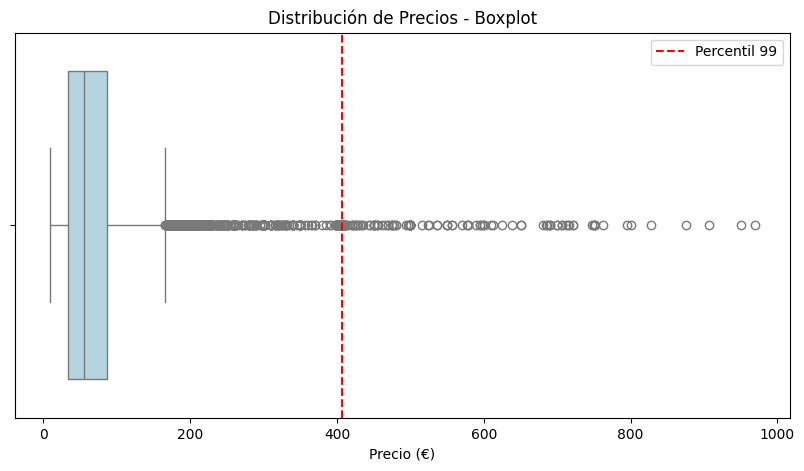

'Percentiles:\n25%: 33.0, 50%: 55.0, 75%: 86.0, 90%: 137.0, 95%: 190.0, 99%: 406.89999999999964'

In [17]:
precio_sin_nulos = data_v2['Price'].dropna()


plt.figure(figsize=(10, 5))
sns.boxplot(x=precio_sin_nulos, color='lightblue')
plt.axvline(np.percentile(precio_sin_nulos, 99), color='red', linestyle='--', label='Percentil 99')
plt.title('Distribución de Precios - Boxplot')
plt.xlabel('Precio (€)')
plt.legend()
plt.show()


percentiles = np.percentile(precio_sin_nulos, [25, 50, 75, 90, 95, 99])
f"Percentiles:\n25%: {percentiles[0]}, 50%: {percentiles[1]}, 75%: {percentiles[2]}, 90%: {percentiles[3]}, 95%: {percentiles[4]}, 99%: {percentiles[5]}"


## Eliminación de Outliers

Para evitar distorsiones en el modelo, eliminamos aquellos precios que superan el **percentil 99**, que corresponde a 299€. Esto nos asegura que el modelo no se vea afectado por precios extremadamente altos.


Eliminamos los Outlayers

In [18]:
data_v2 = data_v2[data_v2['Price'] <= 299]


Volvemos a vizualizar

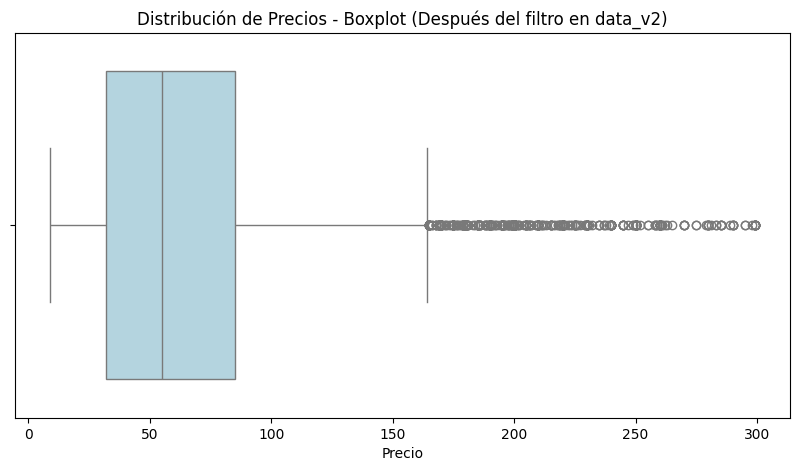

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_v2['Price'], color='lightblue')
plt.title('Distribución de Precios - Boxplot (Después del filtro en data_v2)')
plt.xlabel('Precio')
plt.show()

In [20]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11576 entries, 0 to 11823
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          11576 non-null  object 
 1   Latitude                        11576 non-null  float64
 2   Longitude                       11576 non-null  float64
 3   Property Type                   11576 non-null  object 
 4   Room Type                       11576 non-null  object 
 5   Accommodates                    11576 non-null  int64  
 6   Bathrooms                       11532 non-null  float64
 7   Bedrooms                        11558 non-null  float64
 8   Beds                            11539 non-null  float64
 9   Bed Type                        11576 non-null  object 
 10  Amenities                       11483 non-null  object 
 11  Price                           11576 non-null  float64
 12  Security Deposit                4916 

Hasta ahora hemos limpiado nuestro dataframe de la siguiente manera:

    - Conceptual.
    - % de nulos.
    - Redundacia de datos
    - Outlayer en price
    

## Imputación de Valores Nulos en Variables Numéricas

Para rellenar los valores nulos de variables numéricas (`Bathrooms`, `Bedrooms`, `Beds` y `Price`) utilizamos:
- La **mediana**, ya que es más robusta frente a outliers y representa mejor el valor típico.


In [21]:
data_v2['Bathrooms'] = data_v2['Bathrooms'].fillna(data_v2['Bathrooms'].median())
data_v2['Bedrooms'] = data_v2['Bedrooms'].fillna(data_v2['Bedrooms'].median())
data_v2['Beds'] = data_v2['Beds'].fillna(data_v2['Beds'].median())
data_v2['Price'] = data_v2['Price'].fillna(data_v2['Price'].median())

In [22]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11576 entries, 0 to 11823
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          11576 non-null  object 
 1   Latitude                        11576 non-null  float64
 2   Longitude                       11576 non-null  float64
 3   Property Type                   11576 non-null  object 
 4   Room Type                       11576 non-null  object 
 5   Accommodates                    11576 non-null  int64  
 6   Bathrooms                       11576 non-null  float64
 7   Bedrooms                        11576 non-null  float64
 8   Beds                            11576 non-null  float64
 9   Bed Type                        11576 non-null  object 
 10  Amenities                       11483 non-null  object 
 11  Price                           11576 non-null  float64
 12  Security Deposit                4916 

Las variables Security Deposit y Cleaning Fee presentan bastantes valores nulos, pero considero que ambas pueden influir significativamente en la precisión del modelo al momento de predecir el precio. Antes de imputar estos valores faltantes, vamos a visualizar cómo están distribuidos los datos para entender mejor qué estrategia de imputación podría ser la más adecuada.

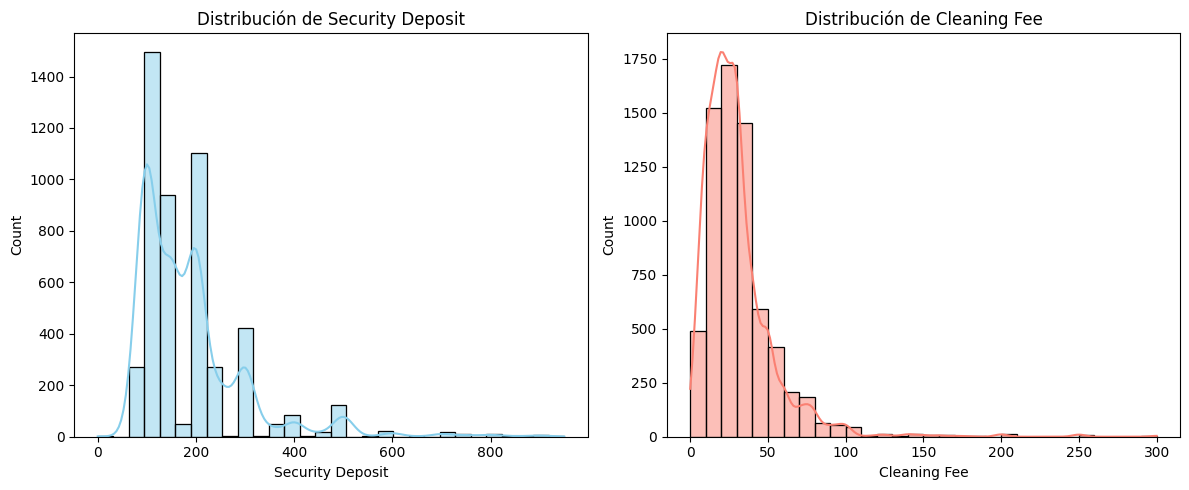

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_v2['Security Deposit'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Security Deposit')
plt.subplot(1, 2, 2)
sns.histplot(data_v2['Cleaning Fee'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Cleaning Fee')

plt.tight_layout()
plt.show()

###  Análisis de outliers:
Para identificar los outliers, generamos un **Boxplot** y calculamos los **percentiles**. 
Los valores por encima del percentil 99 serán considerados como extremos.


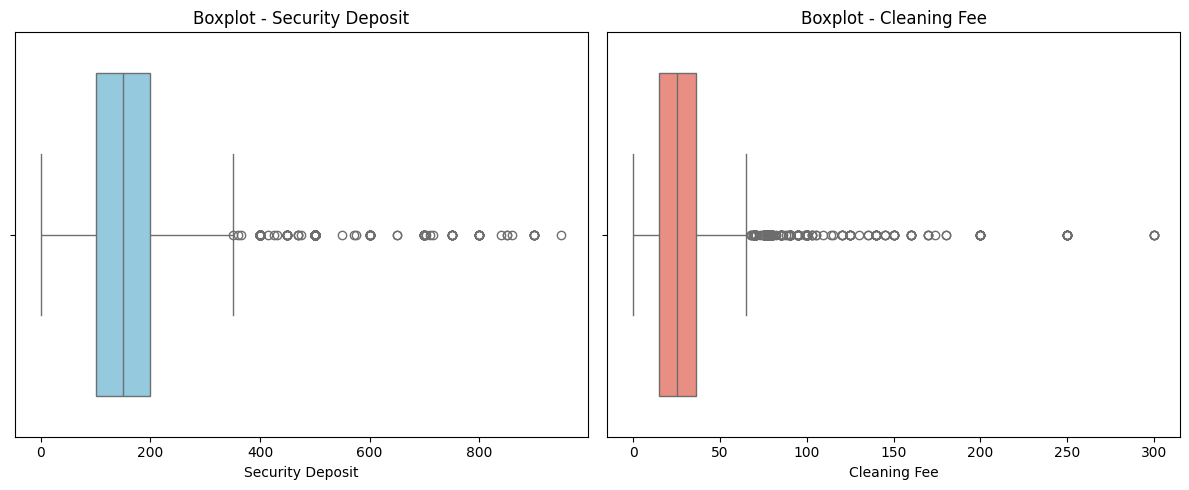

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_v2['Security Deposit'], color='skyblue')
plt.title('Boxplot - Security Deposit')
plt.subplot(1, 2, 2)
sns.boxplot(x=data_v2['Cleaning Fee'], color='salmon')
plt.title('Boxplot - Cleaning Fee')

plt.tight_layout()
plt.show()

percentiles_security = np.percentile(data_v2['Security Deposit'].dropna(), [25, 50, 75, 90, 95, 99])
percentiles_cleaning = np.percentile(data_v2['Cleaning Fee'].dropna(), [25, 50, 75, 90, 95, 99])


In [25]:
f"Percentiles Security Deposit: {percentiles_security}"



'Percentiles Security Deposit: [100. 150. 200. 300. 400. 650.]'

In [26]:

f"Percentiles Cleaning Fee: {percentiles_cleaning}"

'Percentiles Cleaning Fee: [ 15.    25.    36.    50.    70.   118.95]'

### Entrenamiento de modelo para imputación:
Para imputar los outliers, utilizaremos un modelo de **K-Neighbors Regressor**.  
Esto se hace para que los valores extremos sean sustituidos por valores estimados basados en otras características similares:
- `Bedrooms`, `Bathrooms`, `Beds`, `Accommodates` y `Price`.

Definimos los límites:
- `Security Deposit` → 600 €
- `Cleaning Fee` → 100 €


In [27]:
features = ['Bedrooms', 'Bathrooms', 'Beds', 'Accommodates', 'Price']

limite_sd = 600
limite_cf = 100

outliers_sd = data_v2[data_v2['Security Deposit'] > limite_sd]
inliers_sd = data_v2[data_v2['Security Deposit'] <= limite_sd]

outliers_cf = data_v2[data_v2['Cleaning Fee'] > limite_cf]
inliers_cf = data_v2[data_v2['Cleaning Fee'] <= limite_cf]

X_train_sd = inliers_sd[features]
y_train_sd = inliers_sd['Security Deposit']
X_test_sd = outliers_sd[features]

X_train_cf = inliers_cf[features]
y_train_cf = inliers_cf['Cleaning Fee']
X_test_cf = outliers_cf[features]

knn_model_sd = KNeighborsRegressor(n_neighbors=5)
knn_model_sd.fit(X_train_sd, y_train_sd)
y_pred_knn_sd = knn_model_sd.predict(X_test_sd)

knn_model_cf = KNeighborsRegressor(n_neighbors=5)
knn_model_cf.fit(X_train_cf, y_train_cf)
y_pred_knn_cf = knn_model_cf.predict(X_test_cf)

data_v2.loc[data_v2['Security Deposit'] > limite_sd, 'Security Deposit'] = y_pred_knn_sd
data_v2.loc[data_v2['Cleaning Fee'] > limite_cf, 'Cleaning Fee'] = y_pred_knn_cf




### Comprobación final:
Visualizamos de nuevo las distribuciones para comprobar si se han corregido los valores extremos.

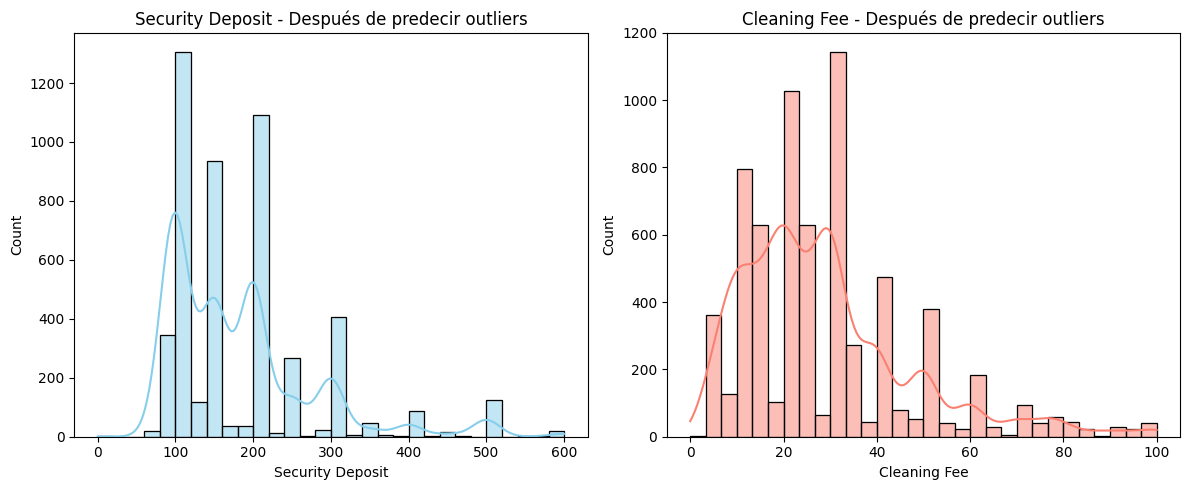

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_v2['Security Deposit'], bins=30, kde=True, color='skyblue')
plt.title('Security Deposit - Después de predecir outliers')

plt.subplot(1, 2, 2)
sns.histplot(data_v2['Cleaning Fee'], bins=30, kde=True, color='salmon')
plt.title('Cleaning Fee - Después de predecir outliers')

plt.tight_layout()
plt.show()

## Imputación de Valores Nulos con KNN

Para rellenar los valores nulos en las variables `Security Deposit` y `Cleaning Fee`, utilizaremos un modelo de **K-Neighbors Regressor (KNN)**.  
El modelo se entrena con:
- `Bedrooms`
- `Bathrooms`
- `Beds`
- `Accommodates`
- `Price`

In [29]:
features = ['Bedrooms', 'Bathrooms', 'Beds', 'Accommodates', 'Price']

train_data_sd = data_v2[data_v2['Security Deposit'].notna()]
test_data_sd = data_v2[data_v2['Security Deposit'].isna()]
X_train_sd = train_data_sd[features]
y_train_sd = train_data_sd['Security Deposit']
X_test_sd = test_data_sd[features]


knn_model_sd = KNeighborsRegressor(n_neighbors=5)
knn_model_sd.fit(X_train_sd, y_train_sd)

y_pred_knn_sd = knn_model_sd.predict(X_test_sd)
data_v2.loc[data_v2['Security Deposit'].isna(), 'Security Deposit'] = y_pred_knn_sd


train_data_cf = data_v2[data_v2['Cleaning Fee'].notna()]
test_data_cf = data_v2[data_v2['Cleaning Fee'].isna()]
X_train_cf = train_data_cf[features]
y_train_cf = train_data_cf['Cleaning Fee']
X_test_cf = test_data_cf[features]

knn_model_cf = KNeighborsRegressor(n_neighbors=5)
knn_model_cf.fit(X_train_cf, y_train_cf)

y_pred_knn_cf = knn_model_cf.predict(X_test_cf)
data_v2.loc[data_v2['Cleaning Fee'].isna(), 'Cleaning Fee'] = y_pred_knn_cf


data_v2[['Security Deposit', 'Cleaning Fee']].isnull().sum()


Security Deposit    0
Cleaning Fee        0
dtype: int64

### Comprobación Final de la Imputación

Visualizamos el número de nulos después de la imputación y generamos un histograma para comprobar la distribución.


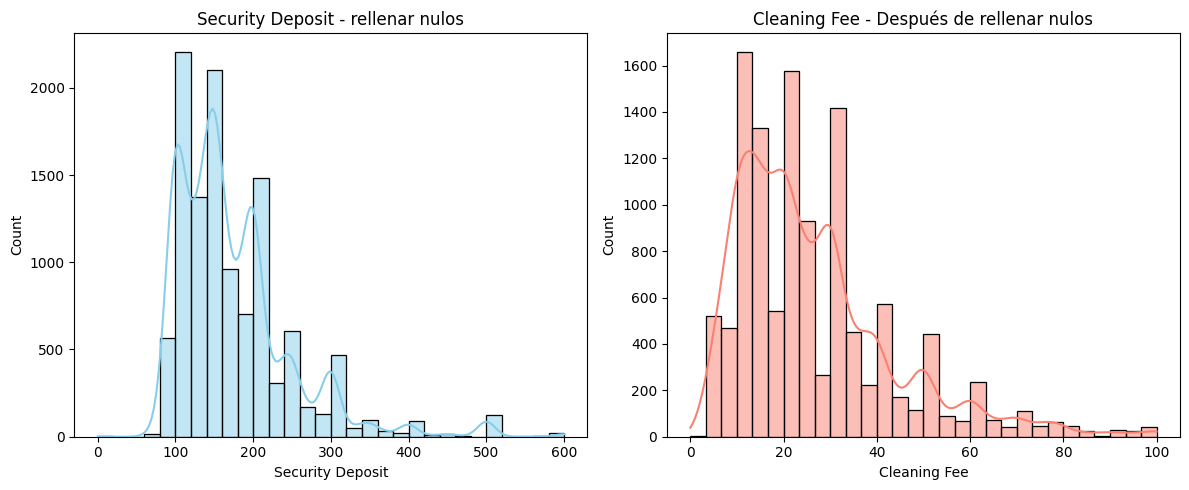

In [30]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_v2['Security Deposit'], bins=30, kde=True, color='skyblue')
plt.title('Security Deposit - rellenar nulos')

plt.subplot(1, 2, 2)
sns.histplot(data_v2['Cleaning Fee'], bins=30, kde=True, color='salmon')
plt.title('Cleaning Fee - Después de rellenar nulos')

plt.tight_layout()
plt.show()

Si revisamos nuestro dataset nos queda Amenities y Reviews per month por imputar los nulos.

In [31]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11576 entries, 0 to 11823
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          11576 non-null  object 
 1   Latitude                        11576 non-null  float64
 2   Longitude                       11576 non-null  float64
 3   Property Type                   11576 non-null  object 
 4   Room Type                       11576 non-null  object 
 5   Accommodates                    11576 non-null  int64  
 6   Bathrooms                       11576 non-null  float64
 7   Bedrooms                        11576 non-null  float64
 8   Beds                            11576 non-null  float64
 9   Bed Type                        11576 non-null  object 
 10  Amenities                       11483 non-null  object 
 11  Price                           11576 non-null  float64
 12  Security Deposit                11576

## Imputación de Review Scores

Para las columnas relacionadas con las puntuaciones (`Review Scores`), seguimos un proceso distinto:

- Creamos una columna adicional binaria para cada una, indicando si existe una puntuación (`1`) o no (`0`).
- Imputamos los valores nulos con `-1` para representar que ese alojamiento no ha recibido aún reviews.  



In [32]:
columnas_reviews = [
    'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin',
    'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value','Reviews per Month'
]

for col in columnas_reviews:
    data_v2[f'Has_{col}'] = data_v2[col].notna().astype(int)
    # Imputar con -1 para representar "No review"
    data_v2[col] = data_v2[col].fillna(-1)




Visualizamos los cambios.

In [33]:
data_v2[columnas_reviews + [f'Has_{col}' for col in columnas_reviews]].head()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,Has_Review Scores Rating,Has_Review Scores Accuracy,Has_Review Scores Cleanliness,Has_Review Scores Checkin,Has_Review Scores Communication,Has_Review Scores Location,Has_Review Scores Value,Has_Reviews per Month
0,100.0,10.0,10.0,10.0,10.0,7.0,10.0,0.13,1,1,1,1,1,1,1,1
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,0,0,0,0,0,0,0,0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,0,0,0,0,0,0,0,0
3,90.0,9.0,9.0,10.0,10.0,10.0,10.0,2.14,1,1,1,1,1,1,1,1
4,91.0,9.0,9.0,10.0,10.0,10.0,9.0,6.54,1,1,1,1,1,1,1,1


## Imputación de Amenities

Para aprovechar la información de las comodidades de cada alojamiento:

- Extraemos todas las amenities y contamos su frecuencia.  
- Seleccionamos las 20 más comunes (las que tienen más influencia en el usuario).  
- Creamos columnas binarias para indicar su presencia (`1`) o ausencia (`0`).  
- Finalmente, eliminamos la columna original, ya que esa información ya está expandida.  


In [34]:

all_amenities = ','.join(data_v2['Amenities'].dropna()).split(',')
amenities_counter = Counter([amenity.strip() for amenity in all_amenities])
pd.DataFrame(amenities_counter.most_common(20), columns=['Amenity', 'Count'])


,Amenity,Count
0,Wireless Internet,10904
1,Kitchen,10687
2,Heating,10464
3,Essentials,10002
4,Washer,9846
5,TV,9049
6,Hangers,7686
7,Shampoo,7260
8,Family/kid friendly,6937
9,Elevator in building,6748


## Selección de las 20 más comunes:
Las más frecuentes son seleccionadas para crear columnas binarias.  


In [35]:
top_20_amenities = [
    'Wireless Internet', 'Kitchen', 'Heating', 'Essentials',
    'Washer', 'TV', 'Hangers', 'Shampoo', 'Elevator in building',
    'Family/kid friendly', 'Iron', 'Hair dryer', 'Internet',
    'Air conditioning', 'Laptop friendly workspace',
    'Buzzer/wireless intercom', 'Smoking allowed', 
    'First aid kit', '24-hour check-in'
]

for amenity in top_20_amenities:
    data_v2[f'Amenity_{amenity}'] = data_v2['Amenities'].apply(lambda x: 1 if pd.notna(x) and amenity in x else 0)

data_v2 = data_v2.drop(columns=['Amenities'])


In [36]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11576 entries, 0 to 11823
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Neighbourhood Cleansed             11576 non-null  object 
 1   Latitude                           11576 non-null  float64
 2   Longitude                          11576 non-null  float64
 3   Property Type                      11576 non-null  object 
 4   Room Type                          11576 non-null  object 
 5   Accommodates                       11576 non-null  int64  
 6   Bathrooms                          11576 non-null  float64
 7   Bedrooms                           11576 non-null  float64
 8   Beds                               11576 non-null  float64
 9   Bed Type                           11576 non-null  object 
 10  Price                              11576 non-null  float64
 11  Security Deposit                   11576 non-null  float64


## Codificación de Variables Categóricas

Para que el modelo de Machine Learning pueda entender las variables categóricas, utilizamos el método de **One-Hot Encoding**.  
Este método transforma cada categoría en una columna binaria, indicando si está presente (`1`) o no (`0`). 

In [37]:
columnas_categoricas = [
    'Neighbourhood Cleansed', 'Property Type',
    'Room Type', 'Bed Type', 'Cancellation Policy'
]

for col in columnas_categoricas:
    print(f"\n Categorías en '{col}':")
    display(data_v2[col].value_counts())



 Categorías en 'Neighbourhood Cleansed':


Neighbourhood Cleansed
Embajadores                       1470
Universidad                       1063
Palacio                            856
Sol                                742
Justicia                           614
                                  ... 
Castello                             1
Takoma, Brightwood, Manor Park       1
el Fort Pienc                        1
Lawton Park                          1
Castro/Upper Market                  1
Name: count, Length: 432, dtype: int64


 Categorías en 'Property Type':


Property Type
Apartment             9403
House                 1038
Condominium            284
Bed & Breakfast        280
Loft                   240
Other                  184
Guesthouse              36
Dorm                    32
Chalet                  15
Townhouse               14
Hostel                  11
Serviced apartment      10
Villa                    8
Camper/RV                4
Boutique hotel           4
Boat                     4
Earth House              3
Casa particular          2
Guest suite              2
Bungalow                 1
Tent                     1
Name: count, dtype: int64


 Categorías en 'Room Type':


Room Type
Entire home/apt    6991
Private room       4418
Shared room         167
Name: count, dtype: int64


 Categorías en 'Bed Type':


Bed Type
Real Bed         11310
Pull-out Sofa      217
Futon               31
Couch               14
Airbed               4
Name: count, dtype: int64


 Categorías en 'Cancellation Policy':


Cancellation Policy
strict             4446
flexible           3649
moderate           3393
strict_new           29
super_strict_60      20
moderate_new         15
super_strict_30      14
flexible_new         10
Name: count, dtype: int64

## One-Hot Encoding:
El método que utilizamos para codificar las categóricas es **OneHotEncoder**:  
- Genera columnas binarias para cada categoría.  
- Evitamos la multicolinealidad eliminando la primera categoría (`drop='first'`).  
- El resultado son nuevas columnas que indican si un registro pertenece o no a esa categoría.  


In [38]:
cols_to_encode = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data_v2[cols_to_encode])
encoded_cols = encoder.get_feature_names_out(cols_to_encode)


encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=data_v2.index)
data_v2 = pd.concat([data_v2.drop(columns=cols_to_encode), encoded_df], axis=1)


Comprobamos que se han creado las nuevas categorías.

In [39]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11576 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Neighbourhood Cleansed               11576 non-null  object 
 1   Latitude                             11576 non-null  float64
 2   Longitude                            11576 non-null  float64
 3   Accommodates                         11576 non-null  int64  
 4   Bathrooms                            11576 non-null  float64
 5   Bedrooms                             11576 non-null  float64
 6   Beds                                 11576 non-null  float64
 7   Price                                11576 non-null  float64
 8   Security Deposit                     11576 non-null  float64
 9   Cleaning Fee                         11576 non-null  float64
 10  Guests Included                      11576 non-null  int64  
 11  Extra People                     

En este punto, me di cuenta de que realizar un encoding de las columna Neighborhood podría sobredimensionar el DataFrame de manera innecesaria. Esto se debe a que ya contamos con los datos de Latitud y Longitud, que son representaciones geográficas mucho más precisas y suficientes para capturar la localización de cada propiedad.


In [40]:
data_v2 = data_v2.drop(columns=['Neighbourhood Cleansed'])

Repetimos el mismo proceso que en Amenities. 

In [41]:

all_features = ','.join(data_v2['Features'].dropna()).split(',')
features_counter = Counter([feature.strip() for feature in all_features])
pd.DataFrame(features_counter.most_common(20), columns=['Feature', 'Count'])

,Feature,Count
0,Host Has Profile Pic,11539
1,Requires License,10989
2,Is Location Exact,7596
3,Host Identity Verified,6821
4,Instant Bookable,4224
5,Host Is Superhost,1358
6,Require Guest Phone Verification,479
7,Require Guest Profile Picture,240


Las más frecuentes son seleccionadas para crear columnas binarias. 

In [42]:

features_to_encode = [
    'Requires License', 'Host Has Profile Pic', 'Is Location Exact',
    'Host Identity Verified', 'Instant Bookable', 'Host Is Superhost',
    'Require Guest Phone Verification', 'Require Guest Profile Picture'
]
for feature in features_to_encode:
    data_v2[f'Feature_{feature}'] = data_v2['Features'].apply(lambda x: 1 if pd.notna(x) and feature in x else 0)

data_v2 = data_v2.drop(columns=['Features'])

In [43]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11576 entries, 0 to 11823
Data columns (total 95 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Latitude                                  11576 non-null  float64
 1   Longitude                                 11576 non-null  float64
 2   Accommodates                              11576 non-null  int64  
 3   Bathrooms                                 11576 non-null  float64
 4   Bedrooms                                  11576 non-null  float64
 5   Beds                                      11576 non-null  float64
 6   Price                                     11576 non-null  float64
 7   Security Deposit                          11576 non-null  float64
 8   Cleaning Fee                              11576 non-null  float64
 9   Guests Included                           11576 non-null  int64  
 10  Extra People                           

## Normalización de Variables Numéricas

Las variables numéricas pueden tener escalas muy distintas.
- Esto puede afectar al modelo, ya que tenderá a dar más peso a las columnas con valores grandes.

Para evitarlo, utilizamos un **StandardScaler** para normalizar:
1 Centramos los datos en torno a la media (`mean = 0`).  
2 Escalamos para que la desviación estándar sea igual a 1 (`std = 1`).  




In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

X = data_v2.drop(columns=['Price'])
y = data_v2['Price']


raw_price = data_v2["Price"].astype(str).str.replace('[^0-9.-]', '', regex=True)
Y_train = pd.to_numeric(raw_price, errors='coerce')
X_train = data_v2.drop(columns=["Price"])


num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


corr_with_target = X_train.corrwith(Y_train)
top_features = corr_with_target.abs().sort_values(ascending=False).head(50).index


corr_top = X_train[top_features].corr()


print("Top 10 features más correlacionadas con Price:\n",
      corr_with_target.abs().sort_values(ascending=False).head(10))
print("\nMatriz de correlaciones entre las top 50:\n", corr_top)


Top 10 features más correlacionadas con Price:
 Cleaning Fee                   0.731673
Accommodates                   0.627076
Bedrooms                       0.547877
Room Type_Private room         0.540546
Beds                           0.498415
Security Deposit               0.455324
Guests Included                0.394466
Bathrooms                      0.330598
Amenity_Air conditioning       0.322187
Amenity_Family/kid friendly    0.300303
dtype: float64

Matriz de correlaciones entre las top 50:
                                           Cleaning Fee  Accommodates  \
Cleaning Fee                                  1.000000      0.510366   
Accommodates                                  0.510366      1.000000   
Bedrooms                                      0.431838      0.690006   
Room Type_Private room                       -0.515557     -0.547936   
Beds                                          0.404570      0.821435   
Security Deposit                              0.419816      0

## Análisis de Correlación entre Variables

Para optimizar el modelo, calculamos la **matriz de correlación** entre todas las variables, con especial interés en:
- Identificar las variables que más influyen en el `Price`.  
- Detectar relaciones fuertes entre variables (colinealidad).

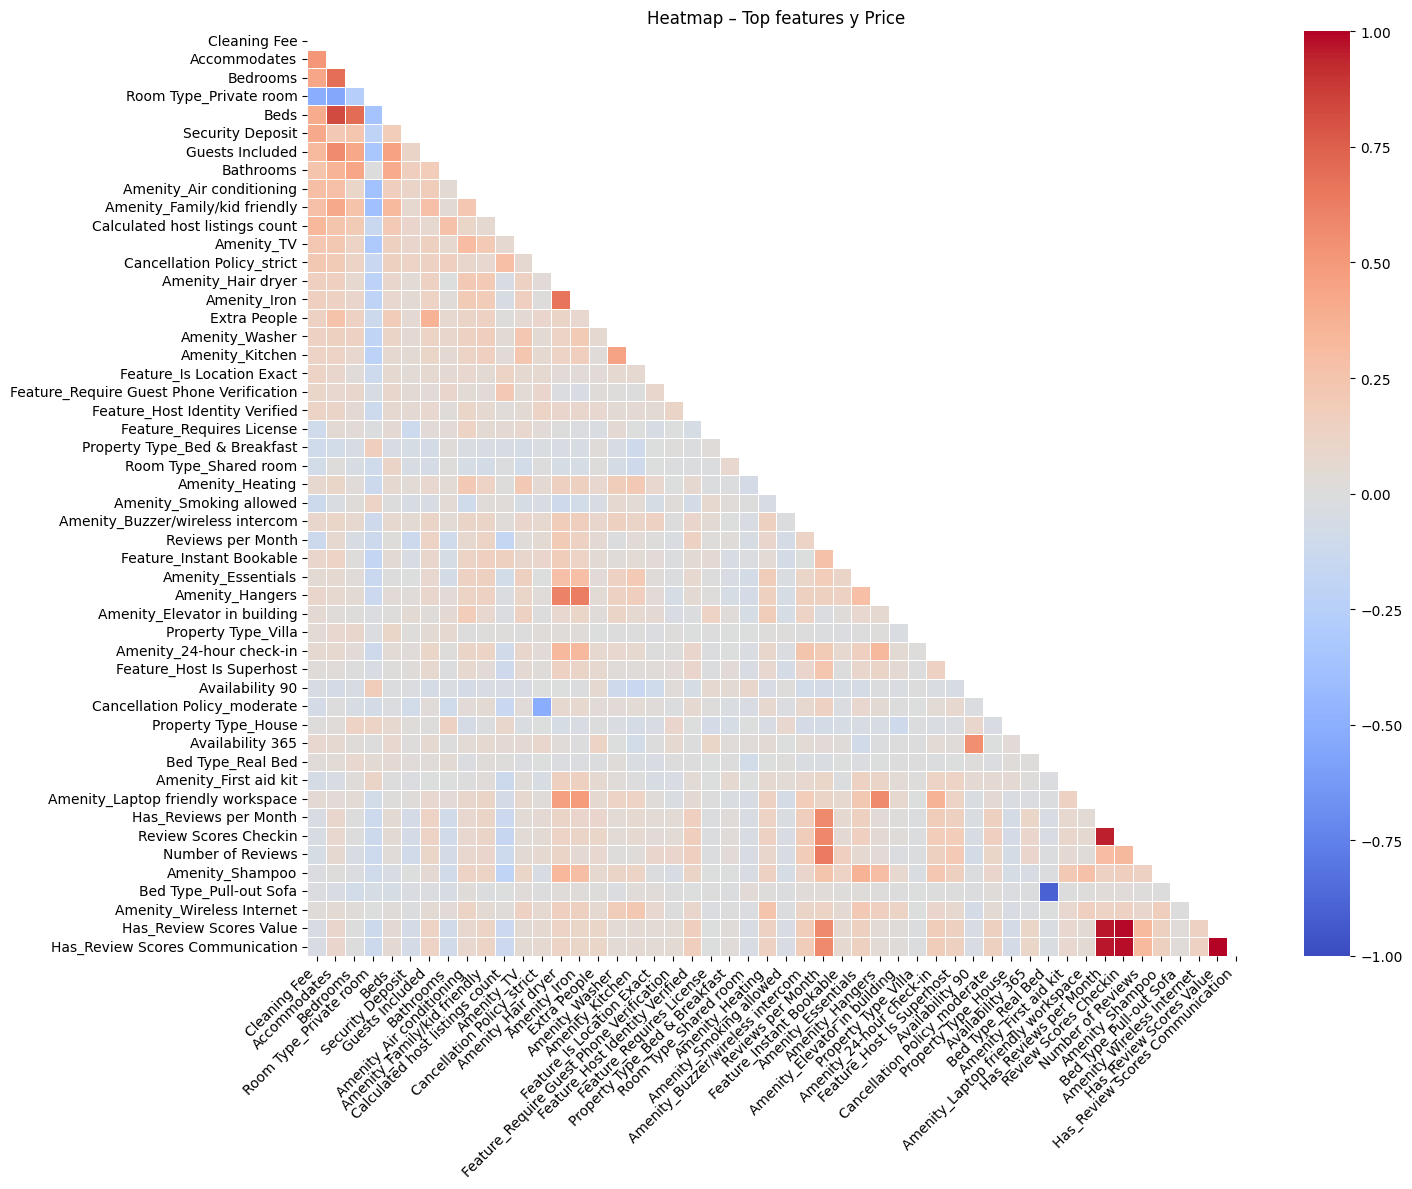

In [45]:

plt.figure(figsize=(15, 12))

# Quieres solo un triángulo?  ->  mask
mask = np.triu(np.ones_like(corr_top, dtype=bool))

sns.heatmap(
    corr_top,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    vmin=-1, vmax=1,   # escala fija (–1 a 1)
    mask=mask,         # quita duplicados si quieres
    annot=False        # annot=True para números
)

plt.title("Heatmap – Top features y Price")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Selecionamos las Feautres más importantes y generamos un nuevo dataset para entrenar los modelos.

In [ ]:

corr_target = X_train.corrwith(Y_train).abs().sort_values(ascending=False)

top50 = corr_target.head(50).index.tolist()
print("Top 50 correlaciones:", top50)
X_train_top = X_train[top50]          #


Top 50 correlaciones: ['Cleaning Fee', 'Accommodates', 'Bedrooms', 'Room Type_Private room', 'Beds', 'Security Deposit', 'Guests Included', 'Bathrooms', 'Amenity_Air conditioning', 'Amenity_Family/kid friendly', 'Calculated host listings count', 'Amenity_TV', 'Cancellation Policy_strict', 'Amenity_Hair dryer', 'Amenity_Iron', 'Extra People', 'Amenity_Washer', 'Amenity_Kitchen', 'Feature_Is Location Exact', 'Feature_Require Guest Phone Verification', 'Feature_Host Identity Verified', 'Feature_Requires License', 'Property Type_Bed & Breakfast', 'Room Type_Shared room', 'Amenity_Heating', 'Amenity_Smoking allowed', 'Amenity_Buzzer/wireless intercom', 'Reviews per Month', 'Feature_Instant Bookable', 'Amenity_Essentials', 'Amenity_Hangers', 'Amenity_Elevator in building', 'Property Type_Villa', 'Amenity_24-hour check-in', 'Feature_Host Is Superhost', 'Availability 90', 'Cancellation Policy_moderate', 'Property Type_House', 'Availability 365', 'Bed Type_Real Bed', 'Amenity_First aid kit', 'A

In [47]:
# Lista de columnas numéricas
num_cols = X_train_top.select_dtypes(include=['float64', 'int64']).columns

# Sustituye NAN por la media de cada columna (CUIDADO: solo entrenas aquí)
X_train_top[num_cols] = X_train_top[num_cols].fillna(X_train_top[num_cols].mean())


C:\Users\Nauzet\AppData\Local\Temp\ipykernel_19076\1319582662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_top[num_cols] = X_train_top[num_cols].fillna(X_train_top[num_cols].mean())


Preparamos el Dataset de test para modelar.

In [48]:
data_test = pd.read_csv("test.csv",sep=";",decimal=".")



In [ ]:
data_test['Bathrooms'] = data_test['Bathrooms'].fillna(data_test['Bathrooms'].median())
data_test['Bedrooms'] = data_test['Bedrooms'].fillna(data_test['Bedrooms'].median())
data_test['Beds'] = data_test['Beds'].fillna(data_test['Beds'].median())
data_test['Price'] = data_test['Price'].fillna(data_test['Price'].median())


In [50]:
features = ['Bedrooms', 'Bathrooms', 'Beds', 'Accommodates', 'Price']

train_data_sd = data_test[data_test['Security Deposit'].notna()]
test_data_sd = data_test[data_test['Security Deposit'].isna()]
X_train_sd = train_data_sd[features]
y_train_sd = train_data_sd['Security Deposit']
X_test_sd = test_data_sd[features]


knn_model_sd = KNeighborsRegressor(n_neighbors=5)
knn_model_sd.fit(X_train_sd, y_train_sd)

y_pred_knn_sd = knn_model_sd.predict(X_test_sd)
data_test.loc[data_test['Security Deposit'].isna(), 'Security Deposit'] = y_pred_knn_sd


train_data_cf = data_test[data_test['Cleaning Fee'].notna()]
test_data_cf = data_test[data_test['Cleaning Fee'].isna()]
X_train_cf = train_data_cf[features]
y_train_cf = train_data_cf['Cleaning Fee']
X_test_cf = test_data_cf[features]

knn_model_cf = KNeighborsRegressor(n_neighbors=5)
knn_model_cf.fit(X_train_cf, y_train_cf)

y_pred_knn_cf = knn_model_cf.predict(X_test_cf)
data_test.loc[data_test['Cleaning Fee'].isna(), 'Cleaning Fee'] = y_pred_knn_cf


data_test[['Security Deposit', 'Cleaning Fee']].isnull().sum()

Security Deposit    0
Cleaning Fee        0
dtype: int64

In [51]:
#Eliminamos las columnas previamentes eliminadas en Train.

columnas_eliminar_test =["Has Availability","Square Feet","Monthly Price","Weekly Price","Access","Transit","Neighbourhood","House Rules","Experiences Offered","City","Market","Street","Neighbourhood Group Cleansed","State","Smart Location","Zipcode","Country Code","Country", "Geolocation","Neighbourhood Cleansed","ID","Name","Summary","Space","Description","Neighborhood Overview","Notes","Interaction","Listing Url","Scrape ID","Last Scraped","Thumbnail Url","Medium Url","Picture Url","XL Picture Url","Host ID","Host URL","Host Name","Host Since","Host Location","Host About","Host Response Time", "Host Response Rate","Host Acceptance Rate","Host Thumbnail Url","Host Picture Url","Host Neighbourhood","Host Listings Count","Host Total Listings Count","Host Verifications","Calendar last Scraped","First Review","Last Review","License","Jurisdiction Names","Calendar Updated"]
data_test.drop(columns=columnas_eliminar_test,inplace=True)
data_test.info()

#Limpiamos Outlayers en el target.
data_test = data_test[data_test['Price'] <= 299]

#Columnas Reviews
for col in columnas_reviews:
    data_test[f'Has_{col}'] = data_test[col].notna().astype(int)
    # Imputar con -1 para representar "No review"
    data_test[col] = data_test[col].fillna(-1)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        2956 non-null   float64
 1   Longitude                       2956 non-null   float64
 2   Property Type                   2956 non-null   object 
 3   Room Type                       2956 non-null   object 
 4   Accommodates                    2956 non-null   int64  
 5   Bathrooms                       2956 non-null   float64
 6   Bedrooms                        2956 non-null   float64
 7   Beds                            2956 non-null   float64
 8   Bed Type                        2956 non-null   object 
 9   Amenities                       2930 non-null   object 
 10  Price                           2956 non-null   float64
 11  Security Deposit                2956 non-null   float64
 12  Cleaning Fee                    29

In [52]:
all_features = ','.join(data_test['Features'].dropna()).split(',')
features_counter = Counter([feature.strip() for feature in all_features])
pd.DataFrame(features_counter.most_common(20), columns=['Feature', 'Count'])




,Feature,Count
0,Host Has Profile Pic,2897
1,Requires License,2782
2,Is Location Exact,1895
3,Host Identity Verified,1682
4,Instant Bookable,1095
5,Host Is Superhost,328
6,Require Guest Phone Verification,98
7,Require Guest Profile Picture,48


In [53]:
features_counter.most_common(20)

[('Host Has Profile Pic', 2897),
 ('Requires License', 2782),
 ('Is Location Exact', 1895),
 ('Host Identity Verified', 1682),
 ('Instant Bookable', 1095),
 ('Host Is Superhost', 328),
 ('Require Guest Phone Verification', 98),
 ('Require Guest Profile Picture', 48)]

In [54]:
features_to_encode = [
    'Requires License', 'Host Has Profile Pic', 'Is Location Exact',
    'Host Identity Verified', 'Instant Bookable', 'Host Is Superhost',
    'Require Guest Phone Verification', 'Require Guest Profile Picture'
]
for feature in features_to_encode:
    data_test[f'Feature_{feature}'] = data_test['Features'].apply(lambda x: 1 if pd.notna(x) and feature in x else 0)

data_test = data_test.drop(columns=['Features'])

In [55]:
for amenity in top_20_amenities:
    data_test[f'Amenity_{amenity}'] =data_test['Amenities'].apply(lambda x: 1 if pd.notna(x) and amenity in x else 0)

data_test = data_test.drop(columns=['Amenities'])

In [56]:
cols_to_encode = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data_test[cols_to_encode])
encoded_cols = encoder.get_feature_names_out(cols_to_encode)


encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=data_test.index)
data_test = pd.concat([data_test.drop(columns=cols_to_encode), encoded_df], axis=1)

In [57]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2911 entries, 0 to 2955
Data columns (total 92 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Latitude                                  2911 non-null   float64
 1   Longitude                                 2911 non-null   float64
 2   Accommodates                              2911 non-null   int64  
 3   Bathrooms                                 2911 non-null   float64
 4   Bedrooms                                  2911 non-null   float64
 5   Beds                                      2911 non-null   float64
 6   Price                                     2911 non-null   float64
 7   Security Deposit                          2911 non-null   float64
 8   Cleaning Fee                              2911 non-null   float64
 9   Guests Included                           2911 non-null   int64  
 10  Extra People                             

In [ ]:

raw_price = data_test["Price"].astype(str).str.replace('[^0-9.-]', '', regex=True)
Y_test = pd.to_numeric(raw_price, errors='coerce')

X_test = data_test.drop(columns=["Price"])


num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])


corr_with_target = X_test.corrwith(Y_test)
top_features = corr_with_target.abs().sort_values(ascending=False).head(50).index


corr_top = X_test[top_features].corr()


In [59]:
corr_target = X_test.corrwith(Y_test).abs().sort_values(ascending=False)

top50 = corr_target.head(50).index.tolist()
print("Top 50 correlaciones:", top50)
X_test_top = X_test[top50] 

Top 50 correlaciones: ['Cleaning Fee', 'Accommodates', 'Room Type_Private room', 'Bedrooms', 'Beds', 'Security Deposit', 'Guests Included', 'Amenity_Air conditioning', 'Amenity_Family/kid friendly', 'Bathrooms', 'Calculated host listings count', 'Amenity_TV', 'Cancellation Policy_strict', 'Amenity_Hair dryer', 'Amenity_Iron', 'Amenity_Washer', 'Feature_Host Identity Verified', 'Room Type_Shared room', 'Extra People', 'Amenity_Elevator in building', 'Amenity_Kitchen', 'Property Type_Bed & Breakfast', 'Amenity_Hangers', 'Feature_Is Location Exact', 'Feature_Require Guest Phone Verification', 'Feature_Instant Bookable', 'Amenity_Smoking allowed', 'Feature_Requires License', 'Amenity_Buzzer/wireless intercom', 'Property Type_Townhouse', 'Amenity_Heating', 'Amenity_Essentials', 'Amenity_24-hour check-in', 'Availability 365', 'Feature_Host Is Superhost', 'Property Type_Villa', 'Reviews per Month', 'Cancellation Policy_super_strict_60', 'Amenity_First aid kit', 'Cancellation Policy_moderate',

In [60]:
print(f"Tamaño del dataset en test:{X_test_top.shape} Tamaño del dataset en train {X_train_top.shape}")
print(f"Target en test: {Y_test.shape} y Train {Y_train.shape}")

Tamaño del dataset en test:(2911, 50) Tamaño del dataset en train (11576, 50)
Target en test: (2911,) y Train (11576,)


In [ ]:

X_train_top.isna().sum().sort_values(ascending=False)

Cleaning Fee                                0
Property Type_House                         0
Reviews per Month                           0
Feature_Instant Bookable                    0
Amenity_Essentials                          0
Amenity_Hangers                             0
Amenity_Elevator in building                0
Property Type_Villa                         0
Amenity_24-hour check-in                    0
Feature_Host Is Superhost                   0
Availability 90                             0
Cancellation Policy_moderate                0
Availability 365                            0
Accommodates                                0
Bed Type_Real Bed                           0
Amenity_First aid kit                       0
Amenity_Laptop friendly workspace           0
Has_Reviews per Month                       0
Review Scores Checkin                       0
Number of Reviews                           0
Amenity_Shampoo                             0
Bed Type_Pull-out Sofa            

In [ ]:

X_test_top.isna().sum().sort_values(ascending=False)

Calculated host listings count              1
Cleaning Fee                                0
Availability 365                            0
Feature_Instant Bookable                    0
Amenity_Essentials                          0
Amenity_Hangers                             0
Amenity_Elevator in building                0
Property Type_Villa                         0
Amenity_24-hour check-in                    0
Feature_Host Is Superhost                   0
Availability 90                             0
Cancellation Policy_moderate                0
Property Type_House                         0
Bed Type_Real Bed                           0
Amenity_Buzzer/wireless intercom            0
Amenity_First aid kit                       0
Amenity_Laptop friendly workspace           0
Has_Reviews per Month                       0
Review Scores Checkin                       0
Number of Reviews                           0
Amenity_Shampoo                             0
Bed Type_Pull-out Sofa            

In [ ]:
X_test_top.fillna(X_test_top.mean(), inplace=True)

In [ ]:
faltan  = X_train_top.columns.difference(X_test_top.columns)


sobran  = X_test_top.columns.difference(X_train_top.columns)

print("FALTAN en test:", list(faltan))
print("SOBRAN en test:", list(sobran))

FALTAN en test: []
SOBRAN en test: []


In [ ]:

cols_keep = X_train_top.columns    

# ---------- ALINEAR TEST ----------
X_test_top = X_test_top.reindex(columns=cols_keep, fill_value=0)

# ¡comprobamos!
assert list(X_train_top.columns) == list(X_test_top.columns)
print("✓ Train y test alineados: ", X_test_top.shape)


✓ Train y test alineados:  (2911, 50)


## Entrenamiento con Regresión Lineal

Para un primer acercamiento, utilizamos un modelo de **Regresión Lineal**.  
El objetivo es observar cómo se comportan las variables predictoras para estimar el (`Price`).  

###  Pasos realizados:
1 Inicialización del modelo.  
2 Entrenamiento con el conjunto de entrenamiento (`X_train`, `y_train`).  
3 Predicción en el conjunto de prueba (`X_test`).  
4 Evaluación del modelo con métricas de error:  
   - **MAE** → Mean Absolute Error  
   - **MSE** → Mean Squared Error  
   - **RMSE** → Root Mean Squared Error  
   - **R2** → R-squared, coeficiente de determinación  


In [71]:
model = LinearRegression()
model.fit(X_train_top, Y_train)
y_pred = model.predict(X_test_top)


mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)


print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared (R2): {r2:.4f}")


 Mean Absolute Error (MAE): 21.71
 Mean Squared Error (MSE): 821.61
 Root Mean Squared Error (RMSE): 28.66
 R-squared (R2): 0.6122


## Visualización de Predicciones vs Valores Reales

Para evaluar el rendimiento del modelo, generamos un gráfico de dispersión donde:  
- Los puntos azules representan las predicciones realizadas por el modelo.  
- La línea roja discontinua representa el comportamiento ideal, donde predicción y valor real coinciden exactamente.  

La proximidad de los puntos a la línea roja nos muestra el nivel de acierto del modelo.  


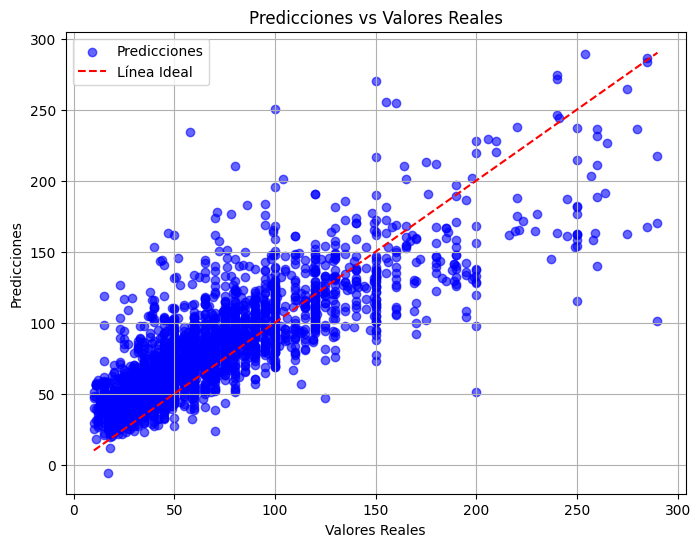

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


## Análisis del gráfico:
- Los puntos azules deberían estar alineados sobre la línea roja para un modelo perfecto.  
- Vemos una buena concentración alrededor de la línea, pero también algo de dispersión en valores altos y bajos.  
- Esto indica que el modelo tiene un buen desempeño, pero puede mejorar.  


## Entrenamiento y Análisis con Random Forest Regressor

Para mejorar el rendimiento del modelo, utilizamos **Random Forest Regressor**

- Es un método basado en múltiples árboles de decisión.  
- Es robusto contra sobreajuste.  
- Permite identificar las variables más importantes en el modelo.  

Además, se aplica un proceso de **Cross-Validation (5-fold)** para validar el modelo de forma más robusta.  


In [73]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)


mae_scores = -cross_val_score(rf_model,X_train_top, Y_train, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf_model, X_train_top, Y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_train_top, Y_train, cv=5, scoring='r2')


print(f" Mean Absolute Error (MAE) Promedio: {np.mean(mae_scores):.2f}")
print(f" Mean Squared Error (MSE) Promedio: {np.mean(mse_scores):.2f}")
print(f" R-squared (R2) Promedio: {np.mean(r2_scores):.4f}")

 Mean Absolute Error (MAE) Promedio: 13.40
 Mean Squared Error (MSE) Promedio: 475.95
 R-squared (R2) Promedio: 0.7784


In [74]:
rf_model.fit(X_train_top, Y_train)
importances = rf_model.feature_importances_
features = X_train_top.columns


feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


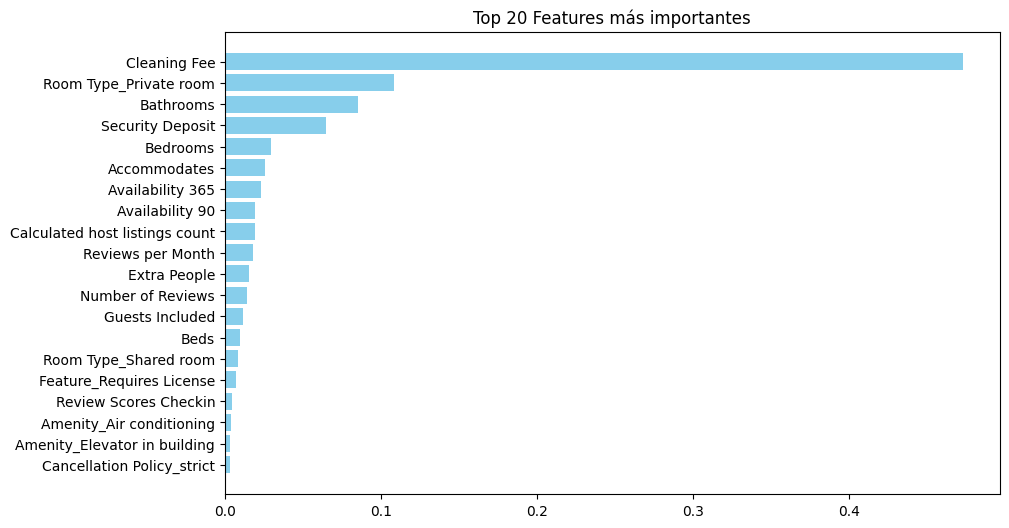

,Feature,Importance
0,Cleaning Fee,0.472747
3,Room Type_Private room,0.108384
7,Bathrooms,0.085092
5,Security Deposit,0.065049
2,Bedrooms,0.029867
1,Accommodates,0.025577
38,Availability 365,0.023149
35,Availability 90,0.019387
10,Calculated host listings count,0.019097
27,Reviews per Month,0.017752


In [75]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.head(20)['Feature'], feature_importances.head(20)['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Features más importantes')
plt.show()

feature_importances.head(20)


## Optimización de Hiperparámetros con GridSearchCV

Para encontrar los mejores parámetros del modelo **RandomForestRegressor**, utilizamos:
- `n_estimators`: Número de árboles en el bosque.  
- `max_depth`: Máxima profundidad de los árboles.  
- `min_samples_split`: Mínimo de muestras para dividir un nodo.  
- `min_samples_leaf`: Mínimo de muestras en cada hoja.  

**GridSearchCV** se encarga de:

1 Probar todas las combinaciones del espacio de búsqueda.  
2 Evaluar el rendimiento con Cross-Validation (5 folds).  
3 Seleccionar los mejores parámetros para el modelo final.  


**Advertencia:**

El proceso de búsqueda de hiperparámetros a través de técnicas como GridSearchCV puede llegar a ser bastante costoso en términos de tiempo de ejecución, especialmente cuando se evalúan múltiples combinaciones. Si dispones de un procesador potente o una máquina con múltiples núcleos, puedes optimizar el proceso aumentando el valor de n_jobs. Este parámetro permite paralelizar la búsqueda y reducir significativamente el tiempo de espera.

In [76]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_top, Y_train)

# 🔍 Mostrar los mejores parámetros
print(f" Mejores parámetros encontrados: {grid_search.best_params_}")
print(f" Mejor puntuación (MAE negativo): {-grid_search.best_score_:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
 Mejores parámetros encontrados: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
 Mejor puntuación (MAE negativo): 13.38


# Entrenamiento del Modelo Optimizado

Con los mejores parámetros obtenidos en el paso anterior:
- `max_depth`: 20  
- `min_samples_leaf`: 2  
- `min_samples_split`: 2  
- `n_estimators`: 300  

In [77]:
best_rf_model = RandomForestRegressor(
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_rf_model.fit(X_train_top, Y_train)
y_pred_optimized = best_rf_model.predict(X_test_top)


mae_optimized = mean_absolute_error(Y_test, y_pred_optimized)
mse_optimized = mean_squared_error(Y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(Y_test, y_pred_optimized)

print(f" Mean Absolute Error (MAE): {mae_optimized:.2f}")
print(f" Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f" R-squared (R2): {r2_optimized:.4f}")


 Mean Absolute Error (MAE): 15.18
 Mean Squared Error (MSE): 554.15
 Root Mean Squared Error (RMSE): 23.54
 R-squared (R2): 0.7384


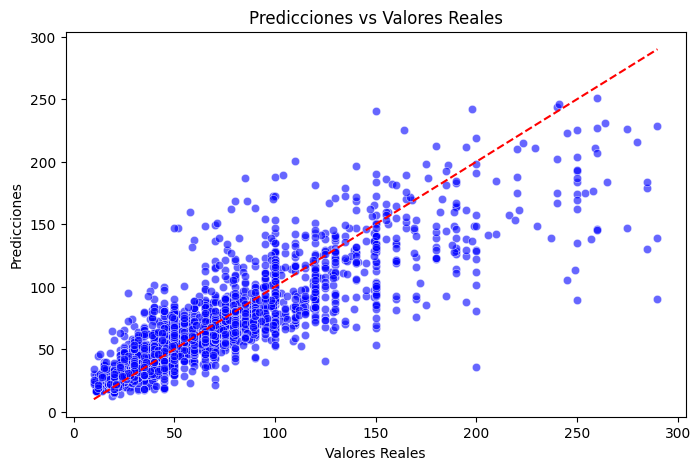

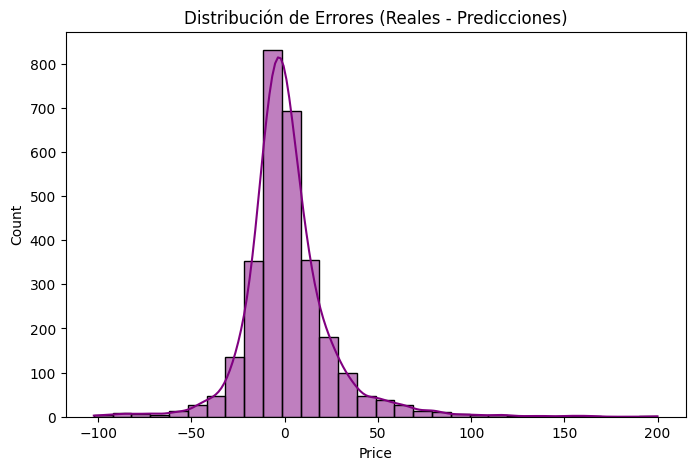

In [78]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_test, y=y_pred_optimized, alpha=0.6, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(Y_test - y_pred_optimized, bins=30, kde=True, color='purple')
plt.title('Distribución de Errores (Reales - Predicciones)')
plt.show()


###  Conclusión Final:
El modelo funciona bastante bien en general. Como se puede ver en las gráficas, la mayoría de las predicciones están cercanas a los valores reales y los errores son generalmente bajos. Las métricas (MAE, MSE, RMSE y R²) también confirman que tenemos un modelo bastante sólido que logra capturar buena parte de la información de los datos. A pesar de esto, hay ciertos valores extremos que siguen dando problemas. Estos casos podrían beneficiarse de una mejor selección de variables, mayor cantidad de datos, o modelos más avanzados que capturen mejor esas particularidades.
